In [2]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from scipy.stats import friedmanchisquare
from statsmodels import robust
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import kruskal
from scipy.stats import wilcoxon
import pingouin as pg

# AL Model Choice

## Preprocessing of tables

In [3]:
os.chdir("C:/users/fionn/Documents/hard_to_find_papers_project") # set the working directory to where the hard_to_find_papers_project folder is located

In [4]:
df_td = pd.read_csv("multiple_models_simulation/Output/simulation/Radjenovic_2013_ndup_nnan/tables/tds/data_tds.csv") # load the TD table
df_td = df_td.iloc[:,1:] # remove unnecessary column
df_td

,Record ID,NB + TF-IDF,Log + TF-IDF,RF + TF-IDF,SVM + TF-IDF,Log + Doc2Vec,RF + Doc2Vec,SVM + Doc2Vec,Log + SBERT,RF + SBERT,SVM + SBERT,Average-Record-TD,SD
0,88,10,17,9,23,112,142,179,72,11,60,63.89,65.50
1,400,55,220,283,95,332,162,170,98,56,62,163.44,98.88
2,466,243,167,588,444,302,353,336,422,449,837,367.11,125.14
3,490,27,36,156,31,141,57,704,75,23,91,138.89,217.55
4,542,18,20,39,18,178,6,143,64,5,33,54.56,63.32
5,588,3,2,18,5,157,85,168,61,20,36,57.67,65.81
6,624,150,170,678,235,726,505,802,1,78,4,371.67,307.10
7,733,26,33,29,50,60,2,84,69,13,57,40.67,26.95
8,734,17,19,40,17,166,9,136,67,7,38,53.11,58.97
9,753,240,172,319,197,353,352,478,8,108,223,247.44,143.80


In [5]:
df_ranks = pd.read_csv("multiple_models_simulation/Output/simulation/Radjenovic_2013_ndup_nnan/tables/td_ranks/data_td_ranks.csv") # load the ranks table
df_ranks = df_ranks.iloc[:,1:] # remove unnecessary column

In [6]:
df_td = df_td.rename(columns={'record_id': 'Record ID', 'td_1': 'Log + Doc2Vec', 'td_2': 'Log + SBERT', 'td_3': 'Log + TF-IDF', 'td_4': 'NB + TF-IDF', 'td_5': 'RF + Doc2Vec', 'td_6': 'RF + SBERT', 'td_7': 'RF + TF-IDF', 'td_8': 'SVM + Doc2Vec', 'td_9': 'SVM + SBERT', 'td_10': 'SVM + TF-IDF'})
# rename columns to contain model names
df_td = df_td[['Record ID', 'NB + TF-IDF', 'Log + TF-IDF', 'RF + TF-IDF', 'SVM + TF-IDF', 'Log + Doc2Vec', 'RF + Doc2Vec', 'SVM + Doc2Vec', 'Log + SBERT', 'RF + SBERT', 'SVM + SBERT', ]] 
# sort AL models by feature-extractor

In [7]:
df_ranks = df_ranks.rename(columns={'record_id': 'Record ID', 'sim_1_ranks': 'Log + Doc2Vec', 'sim_2_ranks': 'Log + SBERT', 'sim_3_ranks': 'Log + TF-IDF', 'sim_4_ranks': 'NB + TF-IDF', 'sim_5_ranks': 'RF + Doc2Vec', 'sim_6_ranks': 'RF + SBERT', 'sim_7_ranks': 'RF + TF-IDF', 'sim_8_ranks': 'SVM + Doc2Vec', 'sim_9_ranks': 'SVM + SBERT', 'sim_10_ranks': 'SVM + TF-IDF'})
# rename the columns to contain model names
df_ranks = df_ranks[['Record ID', 'NB + TF-IDF', 'Log + TF-IDF', 'RF + TF-IDF', 'SVM + TF-IDF', 'Log + Doc2Vec', 'RF + Doc2Vec', 'SVM + Doc2Vec', 'Log + SBERT', 'RF + SBERT', 'SVM + SBERT', ]]
# sort AL models by feature-extractor

## Check normality assumption 

In [8]:
# Check assumption of normality - TD table

print(shapiro(df_td['Log + Doc2Vec']))
print(shapiro(df_td['Log + SBERT']))
print(shapiro(df_td['Log + TF-IDF']))
print(shapiro(df_td['NB + TF-IDF']))
print(shapiro(df_td['RF + Doc2Vec']))
print(shapiro(df_td['RF + SBERT']))
print(shapiro(df_td['RF + TF-IDF']))
print(shapiro(df_td['SVM + Doc2Vec']))
print(shapiro(df_td['SVM + SBERT']))
shapiro(df_td['SVM + TF-IDF']) 

# all groups distributions of TD values are non-normal

ShapiroResult(statistic=0.5186716318130493, pvalue=3.3918420155876206e-11)
ShapiroResult(statistic=0.7873015403747559, pvalue=8.336491532645596e-07)
ShapiroResult(statistic=0.7394766211509705, pvalue=8.89723423824762e-08)
ShapiroResult(statistic=0.6225728988647461, pvalue=9.353073870954631e-10)
ShapiroResult(statistic=0.42058151960372925, pvalue=2.266707871748097e-12)
ShapiroResult(statistic=0.7798603773117065, pvalue=5.777248475169472e-07)
ShapiroResult(statistic=0.7795933485031128, pvalue=5.702517000827356e-07)
ShapiroResult(statistic=0.5572983026504517, pvalue=1.0934043254140491e-10)
ShapiroResult(statistic=0.6919152736663818, pvalue=1.22131105229073e-08)


ShapiroResult(statistic=0.7289122939109802, pvalue=5.6189179531429545e-08)

## RQ1.1 What is the influence of active learning model choice (classifier and feature-extractor) on the variability of TD values and the stability of the rank-order of the TD values of the hardest-to-find papers?

### Add decriptives to TD and Ranks table

In [9]:
# calcuate average-record-td and add to table
df_td['Average-Record-TD'] = df_td.iloc[:, 1:10].mean(axis=1)
df_td['Average-Record-TD'] = df_td['Average-Record-TD'].round(decimals=2)
# calculate SD of average-record-td and add to table 
df_td['SD'] = df_td.iloc[:, 1:10].std(axis=1)
df_td['SD'] = df_td['SD'].round(decimals=2)

In [10]:
# calculate median and add to table
df_ranks['Median'] = df_ranks.iloc[:, 1:-3].median(axis=1)
df_ranks['Median'] = df_ranks['Median'].round(decimals=2)
# calculate IQR and add to table
df_ranks['IQR'] = df_ranks.iloc[:, 1:-4].quantile(q=0.75, axis=1) - df_ranks.iloc[:, 1:-4].quantile(q=0.25, axis=1)
df_ranks['IQR'] = df_ranks['IQR'].round(decimals=2)

## The hardest-to-find papers

In [11]:
# select top 5 hardest-to-find papers across models based on average-record-td
df_top_5_td = df_td.nlargest(5, ['Average-Record-TD']) 
df_top_5_td

,Record ID,NB + TF-IDF,Log + TF-IDF,RF + TF-IDF,SVM + TF-IDF,Log + Doc2Vec,RF + Doc2Vec,SVM + Doc2Vec,Log + SBERT,RF + SBERT,SVM + SBERT,Average-Record-TD,SD
17,2312,1337,927,1554,1006,2708,3286,3119,793,412,881,1682.44,1075.64
44,5655,493,502,473,258,787,483,898,9,297,20,466.67,267.56
35,4826,460,565,689,530,115,110,239,467,563,165,415.33,209.59
25,3230,185,428,959,402,155,170,271,459,514,148,393.67,251.29
6,624,150,170,678,235,726,505,802,1,78,4,371.67,307.10


In [12]:
top_5_td_average = df_top_5_td['Record ID'].tolist() # add these record_ids to list
top_5_td_average

[2312, 5655, 4826, 3230, 624]

In [13]:
df_top_5_ranks = df_ranks[df_ranks['Record ID'].isin(top_5_td_average)] # select the rows in the ranks table that contain the record_ids of the top 5 hardest-to-find papers
df_top_5_ranks

,Record ID,NB + TF-IDF,Log + TF-IDF,RF + TF-IDF,SVM + TF-IDF,Log + Doc2Vec,RF + Doc2Vec,SVM + Doc2Vec,Log + SBERT,RF + SBERT,SVM + SBERT,Median,IQR
6,624,26,31,44,41,45,46,45,1,21,2,44.0,9.0
17,2312,47,47,47,47,47,47,47,47,42,47,47.0,0.0
25,3230,29,44,46,43,14,22,21,45,45,31,29.0,22.0
35,4826,45,46,45,46,11,17,19,46,46,32,45.0,27.5
44,5655,46,45,40,42,46,44,46,4,41,4,45.0,3.0


## Visualisation of hardest-to-find papers (TD values and rank-order of TD values)

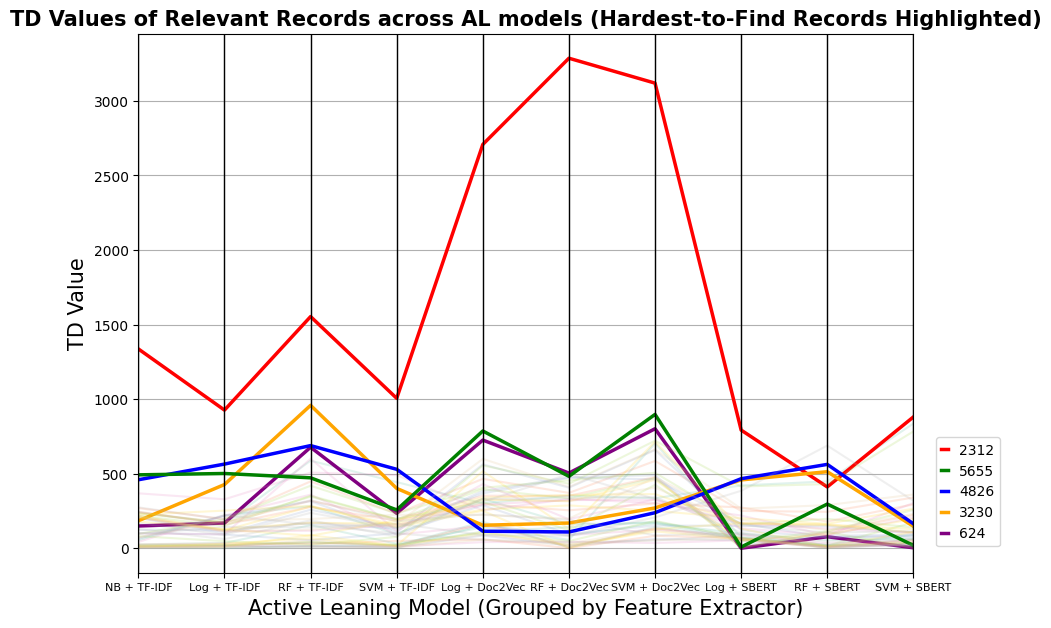

In [14]:
plt.figure(figsize=(10,7))

parallel_coordinates(df_td.iloc[:,:-2], 'Record ID', colormap=plt.get_cmap("Set2"))

# make legend of record ids
legend_labels = df_td['Record ID'].unique()

# Create custom legend handles and labels with the distinct colors
line_width = 2.5
# Define distinct colors for the top 5 labels
distinct_colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create custom legend handles and labels with the distinct colors
custom_handles = [plt.Line2D([], [], color=color, lw=line_width) for color in distinct_colors[:len(top_5_td_average)]]
custom_labels = top_5_td_average

plt.legend(custom_handles, custom_labels, loc='center left', bbox_to_anchor=(1.02, 0.15), handlelength=0.5)
# title
plt.title('TD Values of Relevant Records across AL models (Hardest-to-Find Records Highlighted)', fontsize=15, fontweight='bold')
# x-axis label
plt.xlabel('Active Leaning Model (Grouped by Feature Extractor)', fontsize=15)
# y-axis label
plt.ylabel('TD Value', fontsize=15)

for i in range(len(legend_labels)):
    if legend_labels[i] in top_5_td_average:
        line = plt.gca().get_lines()[i]
        line.set_alpha(1)  # Set alpha to 1 (fully visible)
        line.set_linewidth(line_width)  # Increase line thickness
        label_index = np.where(top_5_td_average == legend_labels[i])[0][0]  # Get the index of the label in top_5_labels
        line.set_color(distinct_colors[label_index])  # Set color based on index

    else:
        plt.gca().get_lines()[i].set_alpha(0.2)  # Set alpha to 0.1 (more transparent)

plt.xticks(fontsize=8)

plt.show()

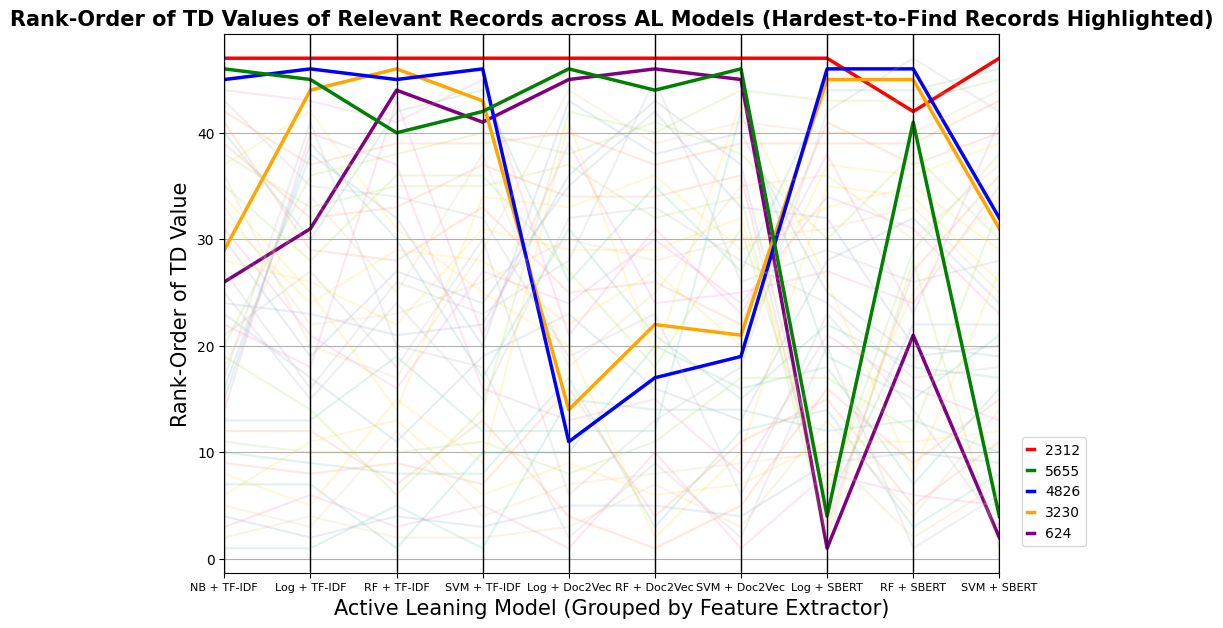

In [15]:
plt.figure(figsize=(10,7))

parallel_coordinates(df_ranks.iloc[:,:-2], 'Record ID', colormap=plt.get_cmap("Set2"))

# make legend of record ids
legend_labels = df_ranks['Record ID'].unique()

# Create custom legend handles and labels with the distinct colors
line_width = 2.5

# Define distinct colors for the top 5 labels
distinct_colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create custom legend handles and labels with the distinct colors
custom_handles = [plt.Line2D([], [], color=color, lw=line_width) for color in distinct_colors[:len(top_5_td_average)]]
custom_labels = top_5_td_average

plt.legend(custom_handles, custom_labels, loc='center left', bbox_to_anchor=(1.02, 0.15), handlelength=0.5)
# title
plt.title('Rank-Order of TD Values of Relevant Records across AL Models (Hardest-to-Find Records Highlighted)', fontsize=15, fontweight='bold')
# x-axis label
plt.xlabel('Active Leaning Model (Grouped by Feature Extractor)', fontsize=15)
# y-axis label
plt.ylabel('Rank-Order of TD Value', fontsize=15)

for i in range(len(legend_labels)):
    if legend_labels[i] in top_5_td_average:
        line = plt.gca().get_lines()[i]
        line.set_alpha(1)  # Set alpha to 1 (fully visible)
        line.set_linewidth(line_width)  # Increase line thickness
        label_index = np.where(top_5_td_average == legend_labels[i])[0][0]  # Get the index of the label in top_5_labels
        line.set_color(distinct_colors[label_index])  # Set color based on index

    else:
        plt.gca().get_lines()[i].set_alpha(0.2)  # Set alpha to 0.1 (more transparent)

plt.xticks(fontsize=8)

plt.show()

## Correlation between average-record-TD and standard deviation

In [16]:
# perform the shapiro test
stat, p = shapiro(df_td['Average-Record-TD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

# perform the shapiro test
stat, p = shapiro(df_td['SD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

Statistics=0.551, p=0.000
Statistics=0.546, p=0.000


In [17]:
spearmanr(df_td['Average-Record-TD'], df_td['SD'])

SignificanceResult(statistic=0.8175300647548566, pvalue=2.3500823241851965e-12)

## Visualisation of relationship between average-record-TD and SD

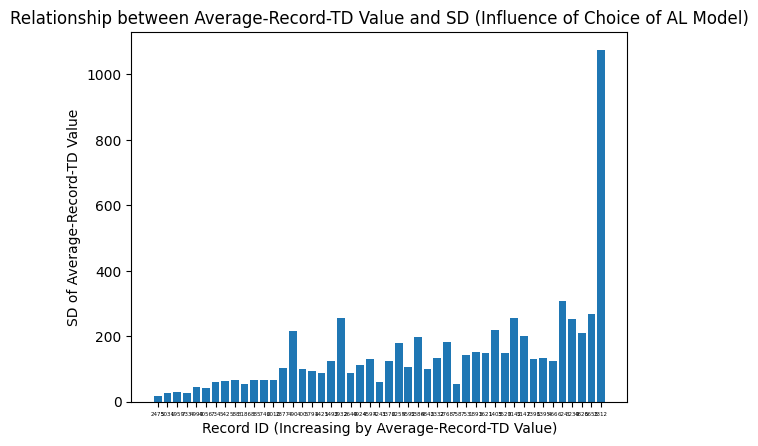

In [18]:
# barchart of record id increasing by mean value on x-axis and SD on y-axis
sorted_df = df_td.sort_values(by='Average-Record-TD')
sorted_record_ids = sorted_df['Record ID']
SD = sorted_df['SD']
# Create an array for the x-axis positions
x_pos = np.arange(len(sorted_record_ids))
plt.bar(x_pos, SD)
plt.xticks(x_pos, sorted_record_ids)
plt.xlabel('Record ID (Increasing by Average-Record-TD Value)')
# make font of x axis smaller 
plt.xticks(fontsize=4)
plt.ylabel('SD of Average-Record-TD Value')
plt.title('Relationship between Average-Record-TD Value and SD (Influence of Choice of AL Model)')
plt.show()


## Visulisation of SDs of hardest-to-find papers

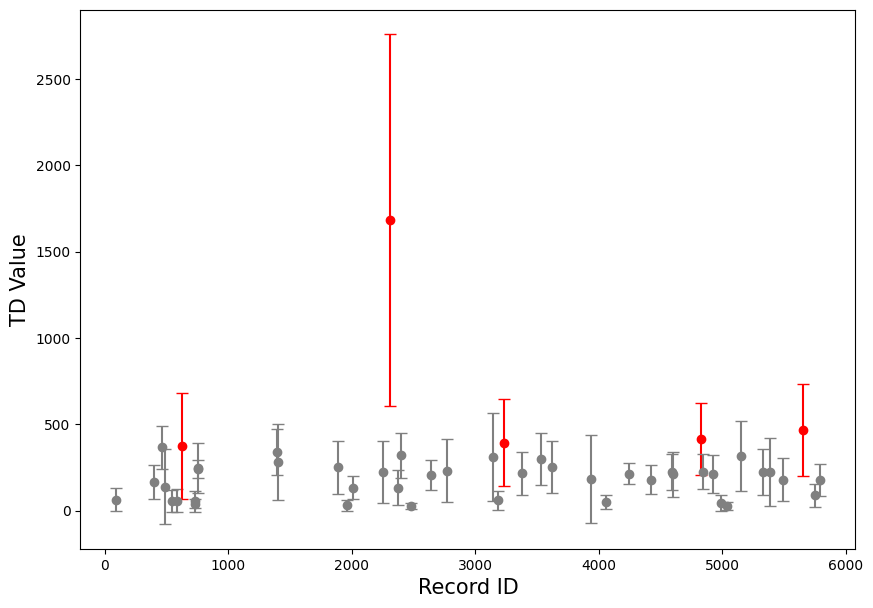

In [19]:
plt.figure(figsize=(10,7))

for i, row in df_td.iterrows():
    record = row['Record ID']
    if record in top_5_td_average:
        plt.errorbar(record, row['Average-Record-TD'], yerr=row['SD'], fmt='o', capsize=4, color='red')
    else:
        plt.errorbar(record, row['Average-Record-TD'], yerr=row['SD'], fmt='o', capsize=4, color = 'grey')
                     
#plt.errorbar(df_td['Record ID'], df_td['Average-Record-TD'], yerr=df_td['SD'], fmt='o', capsize=4)

#plt.title('Standard Deviation and Average-Record-TD of Relevant Records')
plt.xlabel('Record ID', fontsize=15)
plt.ylabel('TD Value', fontsize=15)
plt.show()

## RQ1.2 What is the influence of the AL model choice on the variability of the TD values and the stability of the ranks of the TD values across the entire dataset?

## Add individual varibles for classifier and feature extractor

In [20]:
# transform data into long format

long_data = pd.melt(
    df_td.iloc[:,:-2],
    id_vars = ['Record ID'],
    var_name = 'AL_Model',
    value_name = 'TD_Value'
)

# add columns which specifies classifier and feature extractor used
long_data['Classifier'] = long_data['AL_Model'].apply(lambda x: x.split(' + ')[0]) 
long_data['Feature_Extractor'] = long_data['AL_Model'].apply(lambda x: x.split(' + ')[1])
long_data

,Record ID,AL_Model,TD_Value,Classifier,Feature_Extractor
0,88,NB + TF-IDF,10,NB,TF-IDF
1,400,NB + TF-IDF,55,NB,TF-IDF
2,466,NB + TF-IDF,243,NB,TF-IDF
3,490,NB + TF-IDF,27,NB,TF-IDF
4,542,NB + TF-IDF,18,NB,TF-IDF
...,...,...,...,...,...
465,5386,SVM + SBERT,319,SVM,SBERT
466,5492,SVM + SBERT,66,SVM,SBERT
467,5655,SVM + SBERT,20,SVM,SBERT
468,5746,SVM + SBERT,26,SVM,SBERT


## Test for differences in TD values

In [31]:
# test for differences between AL models 
pg.friedman(data=long_data, dv="TD_Value", within="AL_Model", subject="Record ID")

,Source,W,ddof1,Q,p-unc
Friedman,AL_Model,0.328796,9,139.080558,1.597032e-25


In [194]:
# post-hoc test - pairwise comparisons - Wilcoxon signed-rank test
posthoc = pg.pairwise_tests(data=long_data, dv="TD_Value", within="AL_Model",
                             subject="Record ID", parametric=False, padjust="bonferroni",
                             effsize="hedges")

# Extract the relevant columns from the posthoc results
table = posthoc[['A', 'B', 'p-corr', 'W-val', 'hedges']]

# Rename the columns for clarity
table.columns = ['Group A', 'Group B', 'p-corr', 'T-value', 'Effect Size']

# Sort the table by p-values
table = table.sort_values(by='p-corr')

# Reset the index
table = table.reset_index(drop=True)

# Set the display format for p-values to decimal notation
pd.options.display.float_format = '{:.4f}'.format

# Print the table with p-values in decimal format
print(table)

# save table to csv
table_post_model = pd.DataFrame(table)
table_post_model.to_csv('table_post_model.csv')

          Group A        Group B  p-corr  T-value  Effect Size
0   Log + Doc2Vec    NB + TF-IDF  0.0000  76.5000       0.5363
1     NB + TF-IDF  SVM + Doc2Vec  0.0000  79.0000      -0.6389
2    Log + TF-IDF    RF + TF-IDF  0.0000 105.5000      -0.4846
3   SVM + Doc2Vec   SVM + TF-IDF  0.0000 111.0000       0.6596
4      RF + SBERT  SVM + Doc2Vec  0.0000 114.0000      -0.7306
5    Log + TF-IDF  SVM + Doc2Vec  0.0000 118.0000      -0.6856
6   SVM + Doc2Vec    SVM + SBERT  0.0000  76.0000       0.6361
7     Log + SBERT  SVM + Doc2Vec  0.0000 126.0000      -0.6876
8   Log + Doc2Vec   Log + TF-IDF  0.0000 129.0000       0.5888
9     RF + TF-IDF   SVM + TF-IDF  0.0001 137.0000       0.4461
10   RF + Doc2Vec  SVM + Doc2Vec  0.0001 140.5000      -0.2340
11  Log + Doc2Vec   SVM + TF-IDF  0.0001 144.0000       0.5590
12  Log + Doc2Vec     RF + SBERT  0.0001 145.0000       0.6403
13  Log + Doc2Vec    Log + SBERT  0.0001 146.5000       0.5909
14  Log + Doc2Vec    SVM + SBERT  0.0002 156.5000      

c:\Users\fionn\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [198]:
# test for differences between feature extractors 
pg.friedman(data=long_data, dv="TD_Value", within="Feature_Extractor", subject="Record ID")

,Source,W,ddof1,Q,p-unc
Friedman,Feature_Extractor,0.3789,2,35.6170,0.0000


In [202]:
# post-hoc test - pairwise comparisons - Wilcoxon signed-rank test
pg.pairwise_tests(data=long_data, dv="TD_Value", within="Feature_Extractor",
                             subject="Record ID", parametric=False, padjust="bonferroni",
                             effsize="hedges")


,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Feature_Extractor,Doc2Vec,SBERT,True,False,133.0000,two-sided,0.0000,0.0000,bonferroni,0.5547
1,Feature_Extractor,Doc2Vec,TF-IDF,True,False,171.0000,two-sided,0.0000,0.0000,bonferroni,0.4383
2,Feature_Extractor,SBERT,TF-IDF,True,False,383.0000,two-sided,0.0556,0.1668,bonferroni,-0.1838


In [195]:
# test for differences between classifiers
pg.friedman(data=long_data, dv="TD_Value", within="Classifier", subject="Record ID")

,Source,W,ddof1,Q,p-unc
Friedman,Classifier,0.1741,3,24.5489,0.0000


In [200]:
# post-hoc test - pairwise comparisons - Wilcoxon signed-rank test
pg.pairwise_tests(data=long_data, dv="TD_Value", within="Classifier",
                             subject="Record ID", parametric=False, padjust="bonferroni",
                             effsize="hedges")

,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Classifier,Log,NB,True,False,220.0000,two-sided,0.0002,0.0010,bonferroni,0.2425
1,Classifier,Log,RF,True,False,487.5000,two-sided,0.4217,1.0000,bonferroni,-0.0663
2,Classifier,Log,SVM,True,False,385.5000,two-sided,0.0584,0.3506,bonferroni,-0.1128
3,Classifier,NB,RF,True,False,192.5000,two-sided,0.0000,0.0002,bonferroni,-0.2801
4,Classifier,NB,SVM,True,False,146.0000,two-sided,0.0000,0.0000,bonferroni,-0.3352
5,Classifier,RF,SVM,True,False,489.0000,two-sided,0.4340,1.0000,bonferroni,-0.0394


# Prior Knowledge Choice

## RQ2.1 What is the influence of prior knowledge on the variability of the TD values and the stability of the ranks of the TD values of the hardest-to-find papers?

## Preproccing of tables

In [206]:
# load TD tables 
df_td = pd.read_csv("arfi_simulation/Output/simulation/Radjenovic_2013_ndup_nnan/tables/tds/data_tds.csv")
# remove first column 
df_td = df_td.iloc[:,1:]

In [207]:
# code to name the columns according to prior knowledge 

# create empty list to store tuples of record id and column label
zero_values = []

# Iterate over the rows and columns of the DataFrame
for index, row in df_td.iterrows():
    for col_label, value in row.items():
        if value == 0: # if value is 0, i.e., used as prior knowledge
            record_id = row['record_id']  # Retrieve the record ID value from the 'RecordID' column
            zero_values.append((record_id, col_label))
            
# take the first element from the tuples in the list
zero_values = [i[0] for i in zero_values]

# rename columns of td dataframe with record id (prior knowledge) plus td
df_td.columns = df_td.columns[:1].tolist() + zero_values

In [209]:
# load ranks table
df_ranks = pd.read_csv("arfi_simulation/Output/simulation/Radjenovic_2013_ndup_nnan/tables/td_ranks/data_td_ranks.csv")
# remove first column
df_ranks = df_ranks.iloc[:,1:]
# rename columns of ranks dataframe with record id (prior knowledge) plus td
df_ranks.columns = df_ranks.columns[:1].tolist() + zero_values

In [210]:
# replace 0s with nan - records with 0s are prior knowledge and should not be included in the analysis
df_ranks = df_ranks.replace(0, np.nan)
df_td = df_td.replace(0, np.nan) 

In [211]:
# rename record id column to Record ID
df_td = df_td.rename(columns={'record_id': 'Record ID'})
df_ranks = df_ranks.rename(columns={'record_id': 'Record ID'})

## Test of normality 

In [212]:
# test for normality of td values 

# create a list of the columns to be used in the shapiro test
cols = df_td.columns[2:].tolist()

# remove nan from column and add to list
data = [df_td[col].dropna().tolist() for col in cols]

# perform the shapiro test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

Statistics=0.603, p=0.000


## Add descriptives to TD and ranks tables

In [213]:
# calcuate average-record-td
df_td['Average-Record-TD'] = df_td.iloc[:, 1:10].mean(axis=1)
df_td['Average-Record-TD'] = df_td['Average-Record-TD'].round(decimals=2)
# calculate SD of average-record-td
df_td['SD'] = df_td.iloc[:, 1:10].std(axis=1)
df_td['SD'] = df_td['SD'].round(decimals=2)


In [214]:
df_ranks['Median'] = df_ranks.iloc[:, 1:-3].median(axis=1)
df_ranks['Median'] = df_ranks['Median'].round(decimals=2)
df_ranks['IQR'] = df_ranks.iloc[:, 1:-4].quantile(q=0.75, axis=1) - df_ranks.iloc[:, 1:-4].quantile(q=0.25, axis=1)
df_ranks['IQR'] = df_ranks['IQR'].round(decimals=2)

## The hardest-to-find papers 

In [215]:
# select top 5 hardest-to-find papers across models based on average-record-td
df_top_5_td = df_td.nlargest(5, ['Average-Record-TD']) # select top 5 rows based on mean
df_top_5_td

,Record ID,88,400,466,490,542,588,624,733,734,...,5034,5147,5332,5386,5492,5655,5746,5791,Average-Record-TD,SD
18,2312,1318.0000,1294.0000,1331.0000,1322.0000,1322.0000,1279.0000,1342.0000,1336.0000,1322.0000,...,1318.0000,1352.0000,1318.0000,1343.0000,1338.0000,1257.0000,1294.0000,1358.0000,1318.4400,20.0400
45,5655,522.0000,528.0000,559.0000,526.0000,526.0000,518.0000,547.0000,496.0000,526.0000,...,522.0000,508.0000,520.0000,524.0000,551.0000,NaN,528.0000,505.0000,527.5600,17.6500
36,4826,466.0000,508.0000,398.0000,465.0000,465.0000,480.0000,449.0000,466.0000,465.0000,...,466.0000,513.0000,479.0000,451.0000,476.0000,502.0000,508.0000,466.0000,462.4400,29.0700
20,2398,349.0000,389.0000,333.0000,381.0000,381.0000,379.0000,342.0000,287.0000,381.0000,...,349.0000,378.0000,361.0000,353.0000,378.0000,379.0000,389.0000,334.0000,358.0000,33.5300
47,5791,276.0000,289.0000,266.0000,279.0000,279.0000,284.0000,258.0000,307.0000,279.0000,...,276.0000,258.0000,275.0000,271.0000,272.0000,261.0000,289.0000,NaN,279.6700,13.8000


In [216]:
top_5_td_nb = df_top_5_td['Record ID'].tolist() # add these record_ids to list
top_5_td_nb

[2312, 5655, 4826, 2398, 5791]

In [218]:
df_top_5_ranks = df_ranks[df_ranks['Record ID'].isin(top_5_td_nb)] # select rows from hardest-to-find papers
df_top_5_ranks = df_top_5_ranks.sort_values(by = 88, ascending=False) # sort values by rank
df_top_5_ranks

,Record ID,88,400,466,490,542,588,624,733,734,...,5034,5147,5332,5386,5492,5655,5746,5791,Median,IQR
18,2312,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,...,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,47.0000,0.0000
45,5655,46.0000,46.0000,46.0000,46.0000,46.0000,46.0000,46.0000,46.0000,46.0000,...,46.0000,45.0000,46.0000,46.0000,46.0000,NaN,46.0000,46.0000,46.0000,0.0000
36,4826,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,...,45.0000,46.0000,45.0000,45.0000,45.0000,46.0000,45.0000,45.0000,45.0000,0.0000
20,2398,44.0000,44.0000,44.0000,44.0000,44.0000,44.0000,44.0000,43.0000,44.0000,...,44.0000,44.0000,44.0000,44.0000,44.0000,45.0000,44.0000,44.0000,44.0000,0.0000
47,5791,43.0000,43.0000,42.0000,43.0000,43.0000,43.0000,41.0000,44.0000,43.0000,...,43.0000,41.0000,42.0000,42.0000,43.0000,42.0000,43.0000,NaN,42.0000,1.0000


## Visualisation of hardest-to-find papers (TD values and rank-order of TD values)

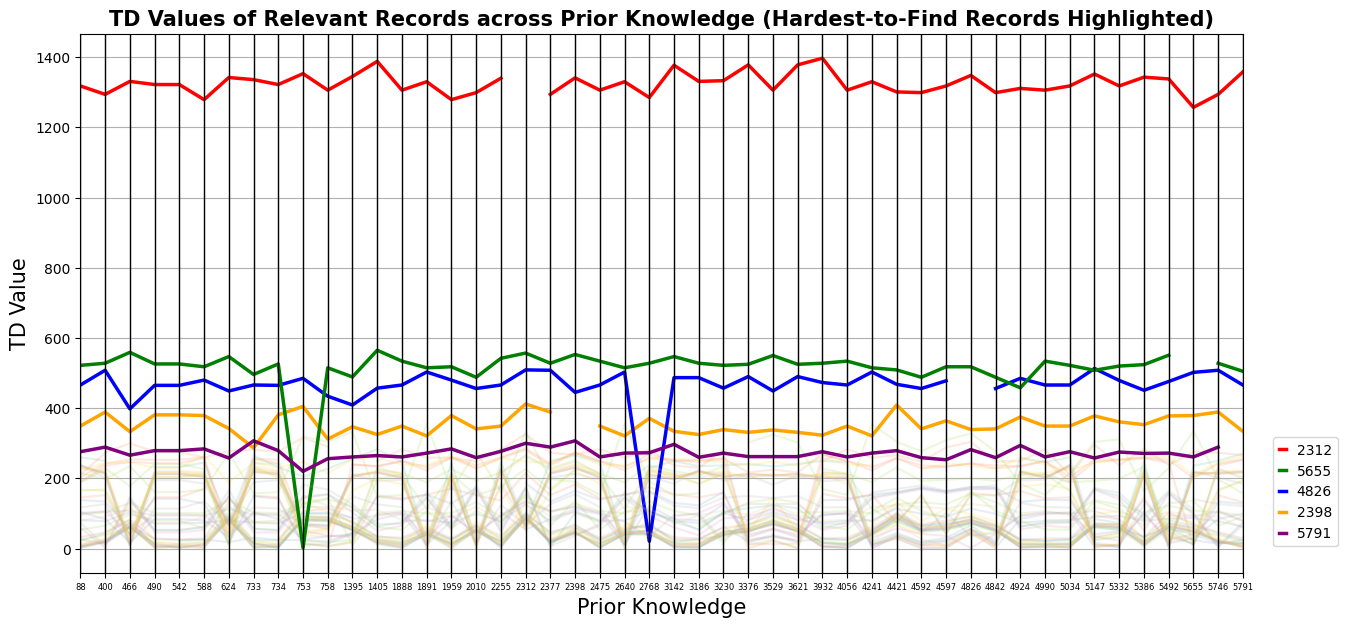

In [220]:
plt.figure(figsize=(15,7))
parallel_coordinates(df_td.iloc[:,:-2], 'Record ID', colormap=plt.get_cmap("Set2"))
# make legend of record ids
legend_labels = df_td['Record ID'].unique()
#top_5_labels = [label for label in legend_labels if label in top_5_td_average]
# Create custom legend handles and labels with the distinct colors
line_width = 2.5
# Define distinct colors for the top 5 labels
distinct_colors = ['red', 'green', 'blue', 'orange', 'purple']
# Create custom legend handles and labels with the distinct colors
custom_handles = [plt.Line2D([], [], color=color, lw=line_width) for color in distinct_colors[:len(top_5_td_nb)]]
custom_labels = top_5_td_nb
plt.legend(custom_handles, custom_labels, loc='center left', bbox_to_anchor=(1.02, 0.15), handlelength=0.5)
plt.title('TD Values of Relevant Records across Prior Knowledge (Hardest-to-Find Records Highlighted)', fontsize=15, fontweight='bold')
# x-axis label
plt.xlabel('Prior Knowledge', fontsize=15)
# y-axis label
plt.ylabel('TD Value', fontsize=15)

for i in range(len(legend_labels)):
    if legend_labels[i] in top_5_td_nb:
        line = plt.gca().get_lines()[i]
        line.set_alpha(1)  # Set alpha to 1 (fully visible)
        line.set_linewidth(line_width)  # Increase line thickness
        label_index = np.where(top_5_td_nb == legend_labels[i])[0][0]  # Get the index of the label in top_5_labels
        line.set_color(distinct_colors[label_index])  # Set color based on index

    else:
        plt.gca().get_lines()[i].set_alpha(0.2)  # Set alpha to 0.1 (more transparent)

plt.xticks(fontsize=6)

plt.show()

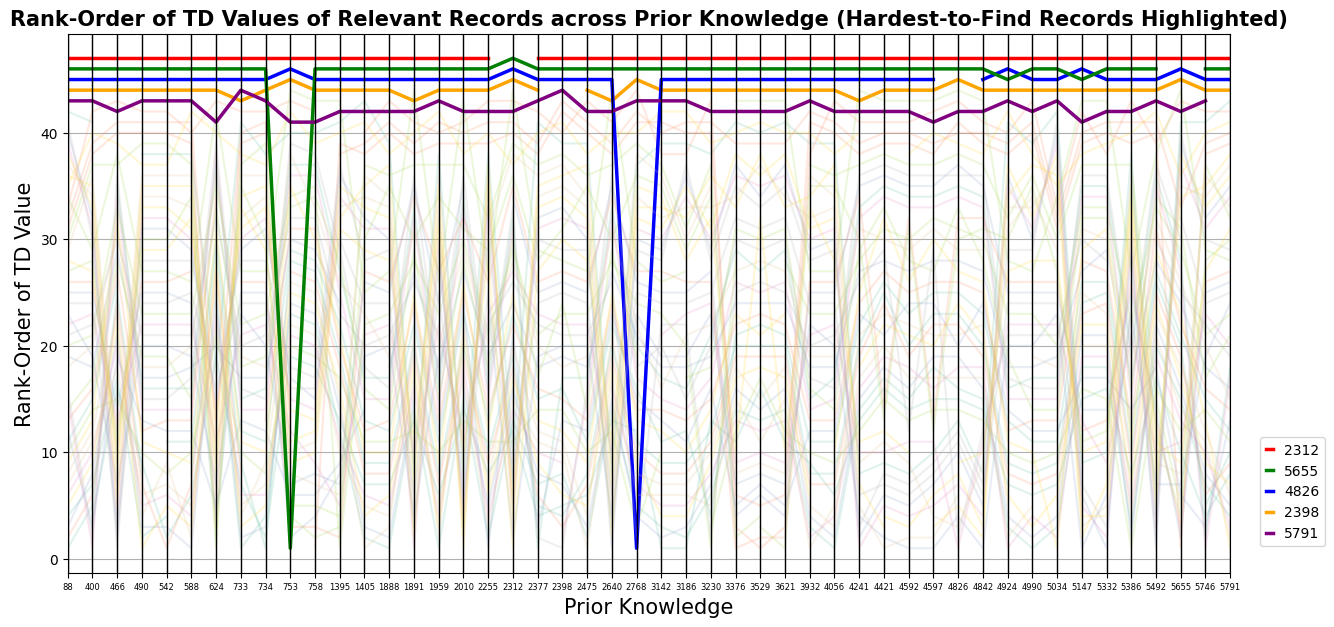

In [221]:
plt.figure(figsize=(15,7))
parallel_coordinates(df_ranks.iloc[:,:-2], 'Record ID', colormap=plt.get_cmap("Set2"))
# make legend of record ids
legend_labels = df_ranks['Record ID'].unique()
#top_5_labels = [label for label in legend_labels if label in top_5_td_average]
# Create custom legend handles and labels with the distinct colors
line_width = 2.5
# Define distinct colors for the top 5 labels
distinct_colors = ['red', 'green', 'blue', 'orange', 'purple']
# Create custom legend handles and labels with the distinct colors
custom_handles = [plt.Line2D([], [], color=color, lw=line_width) for color in distinct_colors[:len(top_5_td_nb)]]
custom_labels = top_5_td_nb
plt.legend(custom_handles, custom_labels, loc='center left', bbox_to_anchor=(1.02, 0.15), handlelength=0.5)
plt.title('Rank-Order of TD Values of Relevant Records across Prior Knowledge (Hardest-to-Find Records Highlighted)', fontsize=15, fontweight='bold')
# x-axis label
plt.xlabel('Prior Knowledge', fontsize=15)
# y-axis label
plt.ylabel('Rank-Order of TD Value', fontsize=15)

for i in range(len(legend_labels)):
    if legend_labels[i] in top_5_td_nb:
        line = plt.gca().get_lines()[i]
        line.set_alpha(1)  # Set alpha to 1 (fully visible)
        line.set_linewidth(line_width)  # Increase line thickness
        label_index = np.where(top_5_td_nb == legend_labels[i])[0][0]  # Get the index of the label in top_5_labels
        line.set_color(distinct_colors[label_index])  # Set color based on index

    else:
        plt.gca().get_lines()[i].set_alpha(0.2)  # Set alpha to 0.1 (more transparent)

plt.xticks(fontsize=6)

plt.show()

## Correlation between average-record-TD and 

In [222]:
# perform the shapiro test
stat, p = shapiro(df_td['Average-Record-TD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

# perform the shapiro test
stat, p = shapiro(df_td['SD'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# data is non-normal 

Statistics=0.576, p=0.000
Statistics=0.889, p=0.000


In [223]:
spearmanr(df_td['Average-Record-TD'], df_td['SD'])

SignificanceResult(statistic=0.1934485847592755, pvalue=0.18770236504749938)

## Visualisation of relationship between average-record-TD and standard deviation 

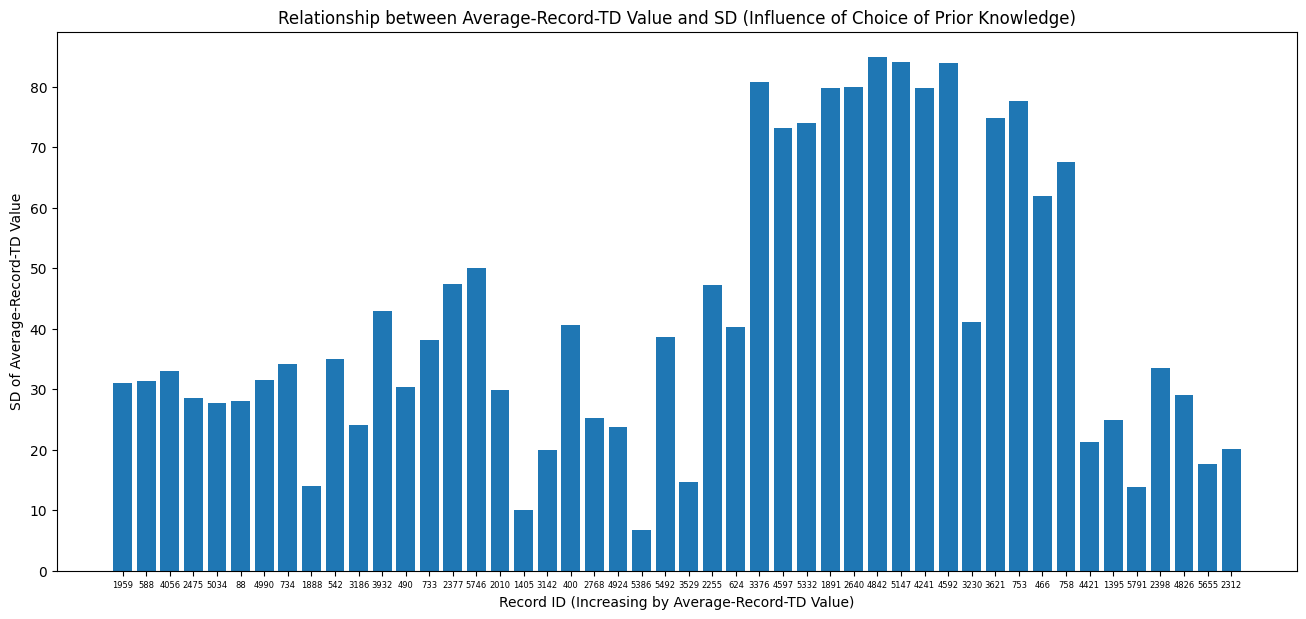

In [224]:
# barchart of record id increasing by mean value on x-axis and SD on y-axis
sorted_df = df_td.sort_values(by='Average-Record-TD')
sorted_record_ids = sorted_df['Record ID']
SD = sorted_df['SD']
# Create an array for the x-axis positions
x_pos = np.arange(len(sorted_record_ids))
plt.figure(figsize=(16,7))
plt.bar(x_pos, SD)
plt.xticks(x_pos, sorted_record_ids)
plt.xlabel('Record ID (Increasing by Average-Record-TD Value)')
# make font of x axis smaller 
plt.xticks(fontsize=6)
plt.ylabel('SD of Average-Record-TD Value')
plt.title('Relationship between Average-Record-TD Value and SD (Influence of Choice of Prior Knowledge)')
plt.show()

## Visulisation of SDs of hardest-to-find papers

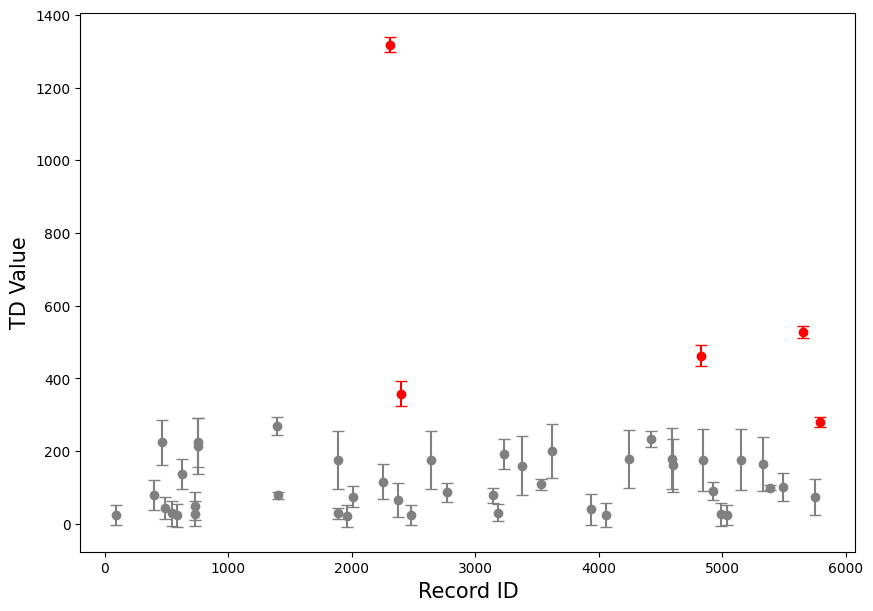

In [225]:
plt.figure(figsize=(10,7))

for i, row in df_td.iterrows():
    record = row['Record ID']
    if record in top_5_td_nb:
        plt.errorbar(record, row['Average-Record-TD'], yerr=row['SD'], fmt='o', capsize=4, color='red')
    else:
        plt.errorbar(record, row['Average-Record-TD'], yerr=row['SD'], fmt='o', capsize=4, color = 'grey')
                     
#plt.errorbar(df_td['Record ID'], df_td['Average-Record-TD'], yerr=df_td['SD'], fmt='o', capsize=4)

#plt.title('Standard Deviation and Average-Record-TD of Relevant Records')
plt.xlabel('Record ID', fontsize=15)
plt.ylabel('TD Value', fontsize=15)
plt.show()

## RQ2.2 What is the influence of prior knowledge on the TD values and the stability of the ranks of the TD values across the entire dataset?

## Test for differences between TD values across prior knowledge 

In [226]:
# create a list of the columns to be used in the kruskal wallis test
cols = df_td.columns[1:-2].tolist()
# remove nan from column and add to list 
data_tds = [df_td[col].dropna().tolist() for col in cols]

stat, p = kruskal(*data_tds)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=35.786, p=0.884
